# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, try 4
# ipath= './data/NCDC/uk/middle_wallop/dat.txt'
# ipath= './data/NCDC/uk/southhamption/dat.txt'
# ipath= './data/NCDC/uk/bournemouth/dat.txt'
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/lakenheath/dat.txt" # irregular sampling time
# ipath= "./data/NCDC/uk/mildenhall/dat.txt" # irregular sampling time

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; narror ellipse
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/binhai/dat.txt" # recent 5 may be corrupted, before is better
# ipath= "./data/NCDC/cn/tianjing/dat.txt"  
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # could apply width/length constrain
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # Problematic data
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data weird
# ipath= "./data/NCDC/cn/wusu/dat.txt" # initial speed weird
# ipath= "./data/NCDC/cn/beijing/dat.txt"  # very bad fit

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly truncate, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/8455636958433dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,1.551120e+05,155112.000000,155112.000000,155112.000000,155112.000000
mean,2.005449e+07,1133.827170,176.534285,4.176262,191.723490
std,6.944657e+04,692.935463,93.961552,2.356673,102.936667
min,1.990072e+07,0.000000,0.000000,0.000000,0.000000
25%,2.002053e+07,600.000000,100.000000,2.500000,110.000000
50%,2.006122e+07,1100.000000,180.000000,3.600000,190.000000
75%,2.011071e+07,1700.000000,270.000000,5.600000,280.000000
max,2.015123e+07,2300.000000,350.000000,19.500000,350.000000


True


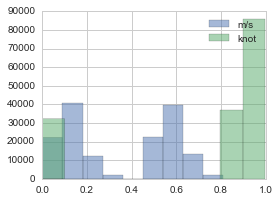

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt.legend()

print knot_unit

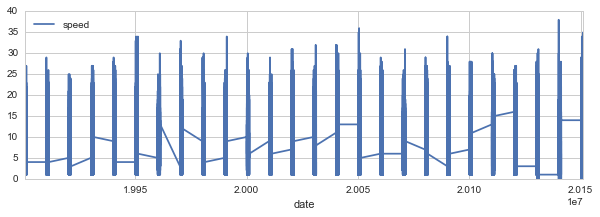

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

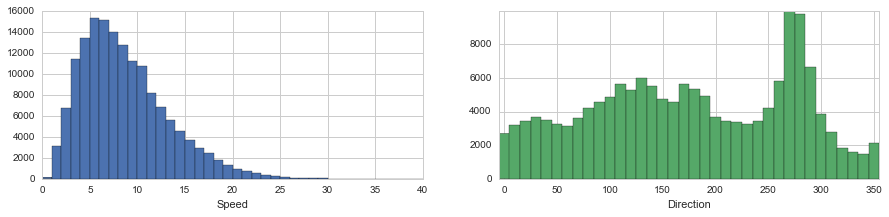

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,
20150822,20150822,600,FM-12,35,11,55,0.885532
20150822,20150822,1800,FM-12,108,8,342,0.164149
20150826,20150826,1500,FM-12,267,8,183,0.358534
20150826,20150826,1800,FM-12,261,5,189,0.442766
20150901,20150901,1500,FM-12,261,4,189,0.276459
20150905,20150905,1200,FM-12,11,8,79,0.969764
20150909,20150909,1500,FM-12,54,8,36,0.164149
20150913,20150913,1500,FM-12,251,6,199,0.025920
20150916,20150916,1500,FM-12,135,4,315,0.082075


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20140116,20140116,900,SAO,110,38,340,0.904978,4.0,15.0
20140116,20140116,1100,SAO,110,37,340,0.933055,14.0,1.0
20140116,20140116,700,SAO,110,37,340,0.933055,4.0,3.0
20050522,20050522,500,SAO,140,36,310,0.961132,0.0,5.0
20050522,20050522,400,SAO,150,36,300,0.961132,9.0,0.0
20140116,20140116,1200,FM-12,100,36,350,0.961132,-1.0,13.0
20140116,20140116,400,SAO,130,35,320,0.989210,6.0,2.0
20151118,20151118,2200,SAO,130,35,320,0.989210,5.0,5.0
20050310,20050310,1100,SAO,110,35,340,0.989210,4.0,3.0


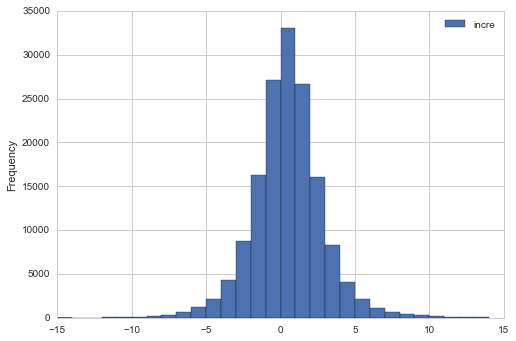

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 1


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20140116,20140116,900,SAO,110,38,340,0.904978,4.0,15.0
20140116,20140116,1100,SAO,110,37,340,0.933055,14.0,1.0
20140116,20140116,700,SAO,110,37,340,0.933055,4.0,3.0
20050522,20050522,500,SAO,140,36,310,0.961132,0.0,5.0
20140116,20140116,1200,FM-12,100,36,350,0.961132,-1.0,13.0
20050522,20050522,400,SAO,150,36,300,0.961132,9.0,0.0
20151118,20151118,2200,SAO,130,35,320,0.989210,5.0,5.0
20050310,20050310,1100,SAO,110,35,340,0.989210,4.0,3.0
20140116,20140116,400,SAO,130,35,320,0.989210,6.0,2.0


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0      2700
10     3206
20     3418
30     3656
40     3498
50     3262
60     3115
70     3591
80     4204
90     4553
100    4858
110    5666
120    5276
130    6023
140    5510
150    4728
160    4560
170    5637
180    5361
190    4947
200    3653
210    3418
220    3405
230    3242
240    3439
250    4228
260    5816
270    9955
280    9776
290    6643
300    3869
310    2785
320    1830
330    1596
340    1502
350    2104
Name: dir, dtype: int64

In [13]:
effective_coloumn = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_coloumn) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_coloumn.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_coloumn)
print len(effective_coloumn), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

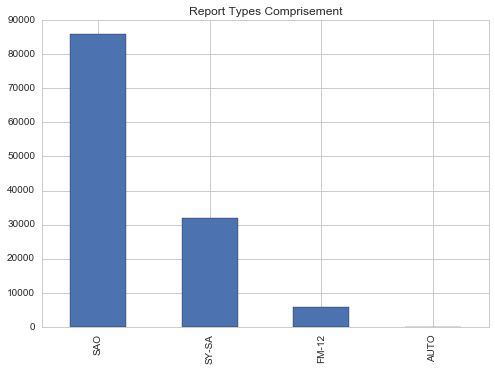

In [14]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

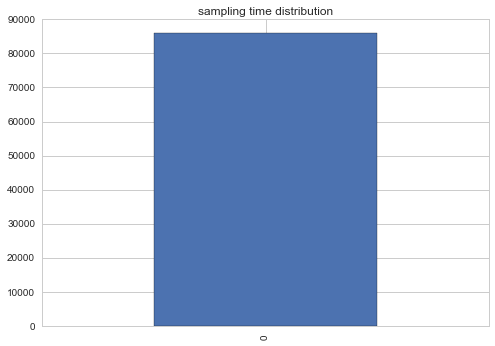

In [15]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = sample_time.value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

0       1444
100     5944
200     5976
300     1819
400     5991
500     5998
600     1418
700     5982
800     6008
900     1861
1000    6033
1100    6005
1200    1485
1300    5996
1400    5971
1500    1862
1600    5981
1700    5971
1800    1437
1900    5960
2000    5983
2100    1847
2200    5969
2300    5959
Name: HrMn, dtype: int64

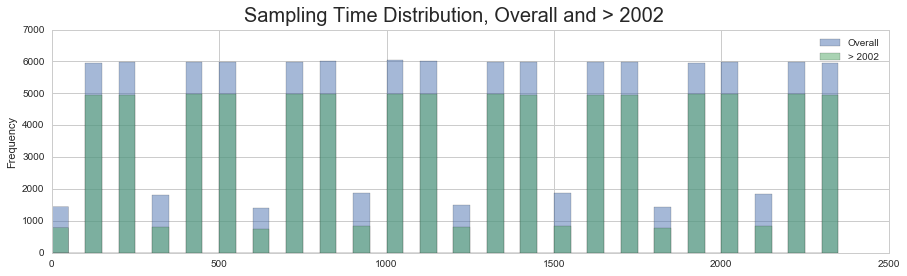

In [17]:
MID_YEAR = int(((min(df.date)+max(df.date))/2 )/10000)
# Ensure data sampled equally
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt.suptitle('Sampling Time Distribution, Overall and > %s ' %  MID_YEAR, fontsize = 20)
plt.legend()

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5)
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

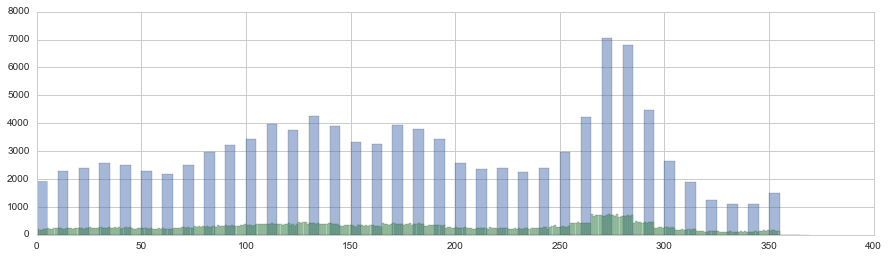

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    if len(df.query('speed < 1')) > 200:
        # if has zero data
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(0,1)))
    else:
        # if lack zero
        df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)

    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5)
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

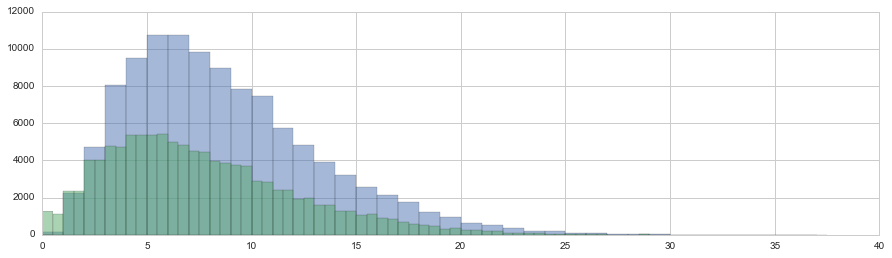

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

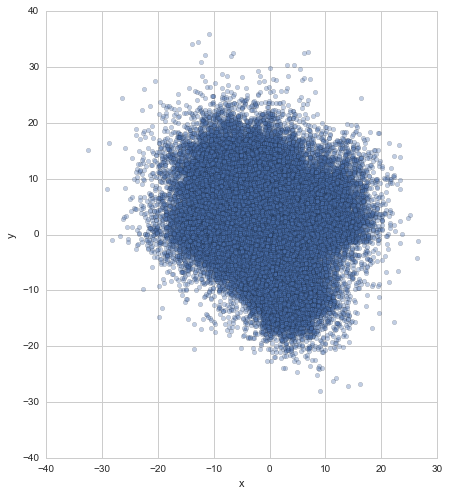

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

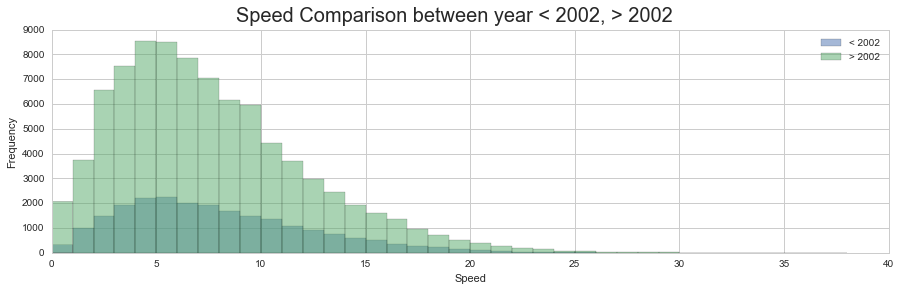

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.xlabel("Speed")
plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.legend()

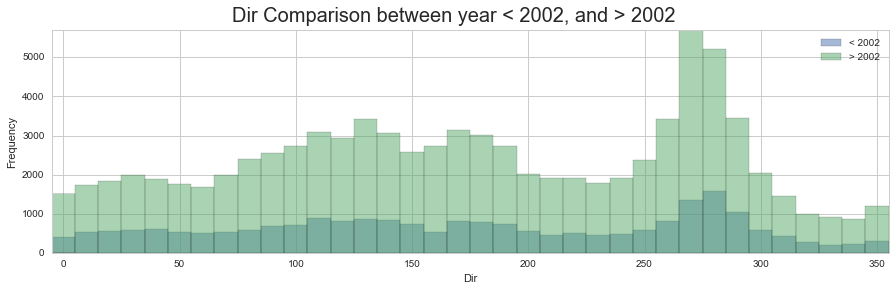

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.xlabel("Dir")
plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.axis('tight')
plt.legend()

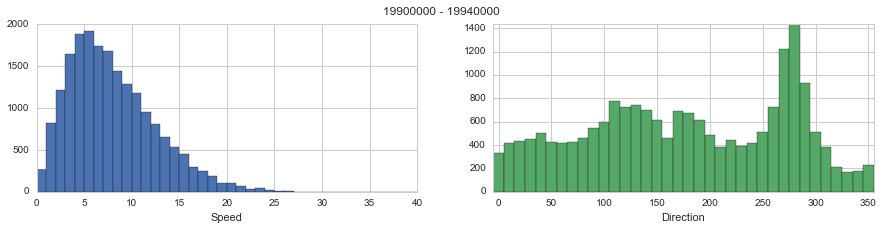

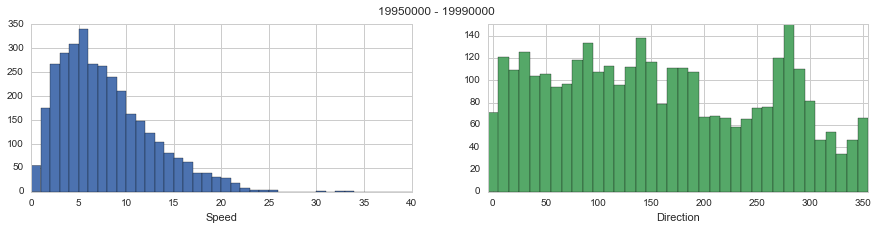

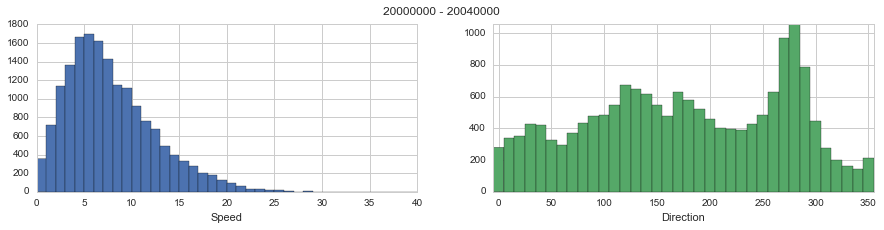

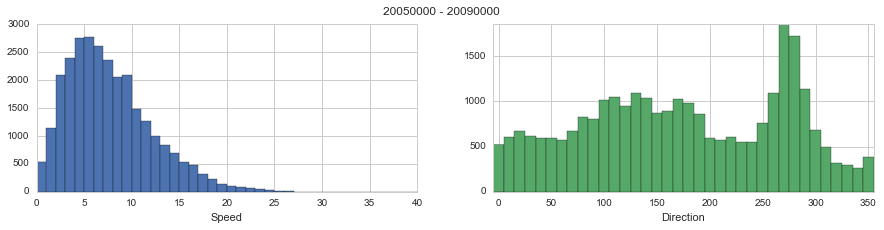

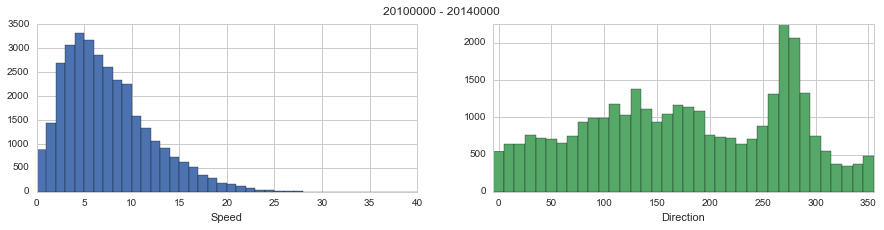

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time, end_time-10000)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 20
Report type used: SAO
Sampling time used: 0


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,3.272100e+04,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000,32721.000000
mean,2.012260e+07,1181.809847,177.514371,7.463837,191.404297,0.761021,0.001161,-0.004584,-0.798788,0.355524
std,1.433008e+04,690.327277,93.734977,4.599913,102.906326,0.341678,2.188531,2.181967,5.555433,6.726250
min,2.010010e+07,0.000000,-4.973442,0.000000,0.000000,0.000000,-17.000000,-22.000000,-24.563207,-21.799875
25%,2.011060e+07,600.000000,103.278009,4.027519,110.000000,0.831535,-1.000000,-1.000000,-3.959060,-3.950517
50%,2.012110e+07,1100.000000,176.182890,6.620756,190.000000,0.913609,0.000000,0.000000,-0.544964,0.025161
75%,2.013123e+07,1700.000000,266.467536,9.961671,280.000000,0.963291,1.000000,1.000000,2.027366,4.251627
max,2.014123e+07,2300.000000,354.999688,37.596401,350.000000,0.997842,22.000000,18.000000,26.605061,35.993395


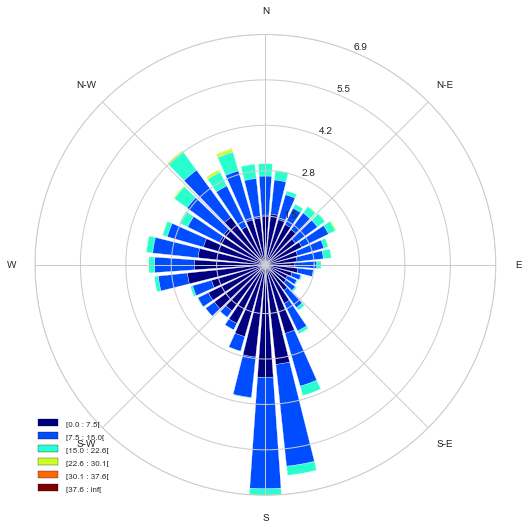

In [27]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

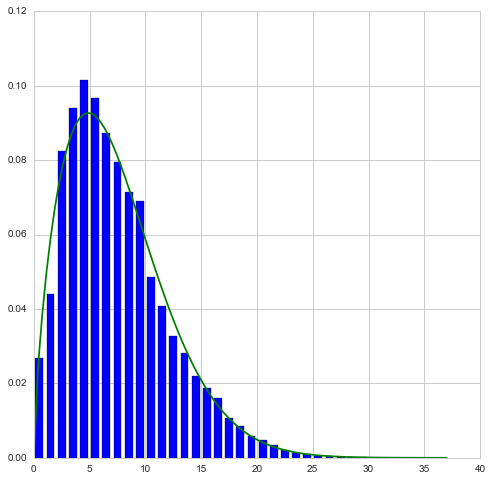

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

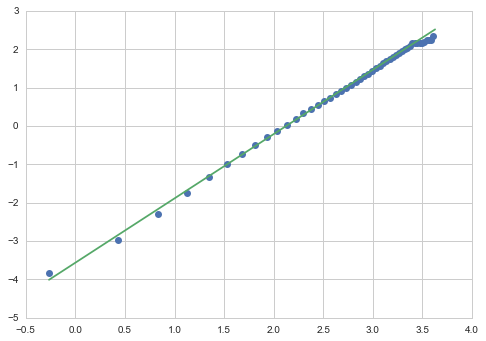

In [29]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [30]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
max_speed = df.speed.max()
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [31]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
plot_limit = ceil(df['speed'].quantile(.975))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)
    
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
print fitting_axis_range

[-17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.
  13.  14.  15.  16.  17.]


# 3. Kernel Density Estimation

In [32]:
sample = SPEED_SET

In [33]:
# # The bandwidth value sometimes would be too radical
# from sklearn.grid_search import GridSearchCV

# if knot_unit:
#     bandwidth_range = arange(0.5,2,0.2)
# else:
#     bandwidth_range = arange(0.4,1,0.1)

# grid = GridSearchCV(neighbors.KernelDensity(),
#                     {'bandwidth': bandwidth_range},
#                     n_jobs=-1, cv=4) 
# grid.fit(sample)
# bandwidth = grid.best_params_['bandwidth']

In [34]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 1.5 1225
[  2.58221591e-07   4.51976455e-07   6.67958341e-07   1.01184161e-06
   1.79419827e-06]


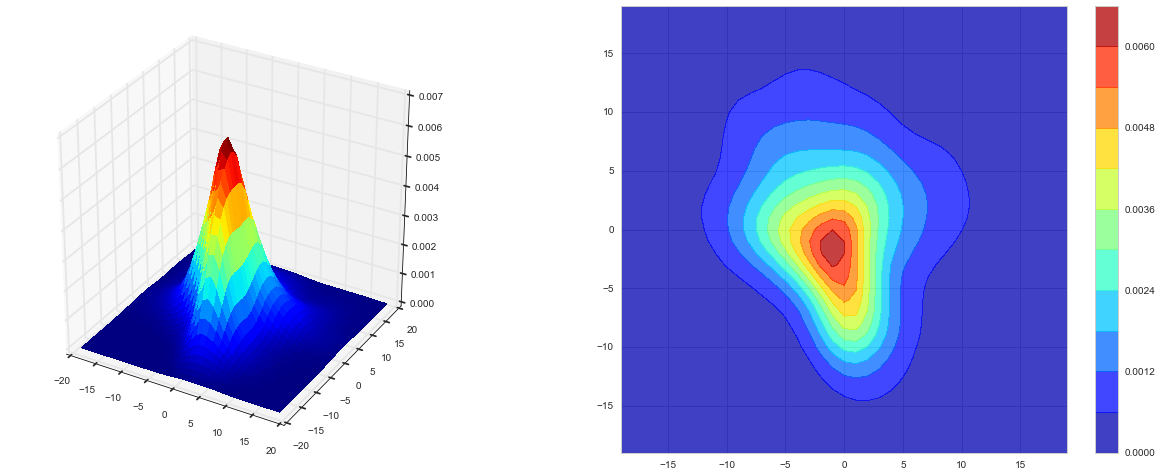

In [35]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [36]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM Estimation, using EM algo

In [37]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [38]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.440680,-0.497617,-3.513379,2.875782,5.024038,-0.478139
2,0.302072,-4.572819,3.624239,5.510073,6.672876,-0.196993
3,0.257248,3.116909,3.144893,6.159691,5.863096,0.015348


GMM Plot Result
0.440679870117 [[-0.49761702 -3.51337862]] [ 2.41114976  5.26283563] -160.425104562
0.302071635001 [[-4.57281854  3.62423949]] [ 5.22621053  6.89745666] -157.180318864
0.257248494881 [[ 3.11690877  3.14489313]] [ 5.85591369  6.16651908] -81.3653445561


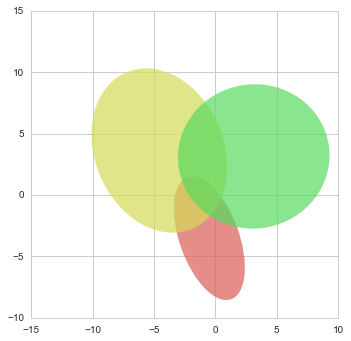

In [39]:
plot_gmm_ellipses(gmm_em_result)

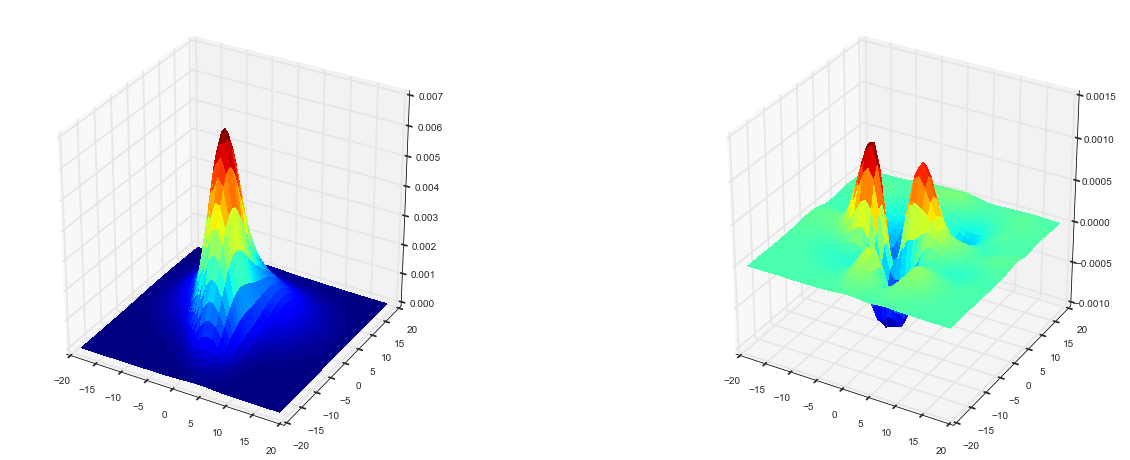

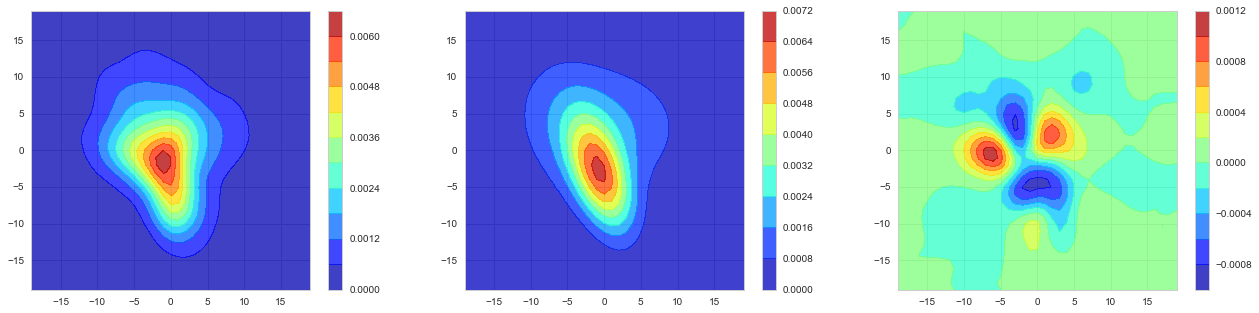

In [40]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## GMM, EM VS. KDE

In [41]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.045478,0.024146,5.201458e-08,0.035881,0.285515,0.963765


# 5. Least Square Prob Estimation

In [42]:
sample = SPEED_SET
points = FITTING_RANGE

In [43]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -18.809190974487823
     jac: array([  2.68442154e+00,   2.38418579e-07,   0.00000000e+00,
         0.00000000e+00,   2.38418579e-07,   0.00000000e+00,
         2.68442321e+00,   0.00000000e+00,   2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,  -4.76837158e-07,
         2.68442273e+00,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,  -2.38418579e-07,  -2.38418579e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 999
     nit: 49
    njev: 49
  status: 0
 success: True
       x: array([ 0.28765104,  0.06247761, -5.52859233,  2.55628025,  4.51700534,
       -0.34878989,  0.48002453, -0.81560127,  4.11183787,  7.34252233,
        6.47315032, -0.23973198,  0.23232443, -2.44611326,  0.06888557,
        4.54062452,  2.98560364,  0.16280997])

## 5.1 GMM Result

In [44]:
# gmm = group_gmm_param_from_gmm_param_array(gmm_em_result, sort_group = True)
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.480025,-0.815601,4.111838,7.342522,6.473150,-0.239732
2,0.287651,0.062478,-5.528592,2.556280,4.517005,-0.348790
3,0.232324,-2.446113,0.068886,4.540625,2.985604,0.162810


GMM Plot Result
0.480024532618 [[-0.81560127  4.11183787]] [ 5.91837092  7.79661432] -121.10402073
0.287651039621 [[ 0.06247761 -5.52859233]] [ 2.33449822  4.63551767] -164.926321115
0.232324427761 [[-2.44611326  0.06888557]] [ 2.91743467  4.58472192] -79.6673408081


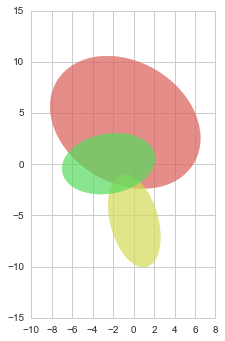

In [45]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit statistics

In [46]:
pretty_pd_display([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.022106,0.00943,6.780663e-09,0.012955,0.103087,0.995276


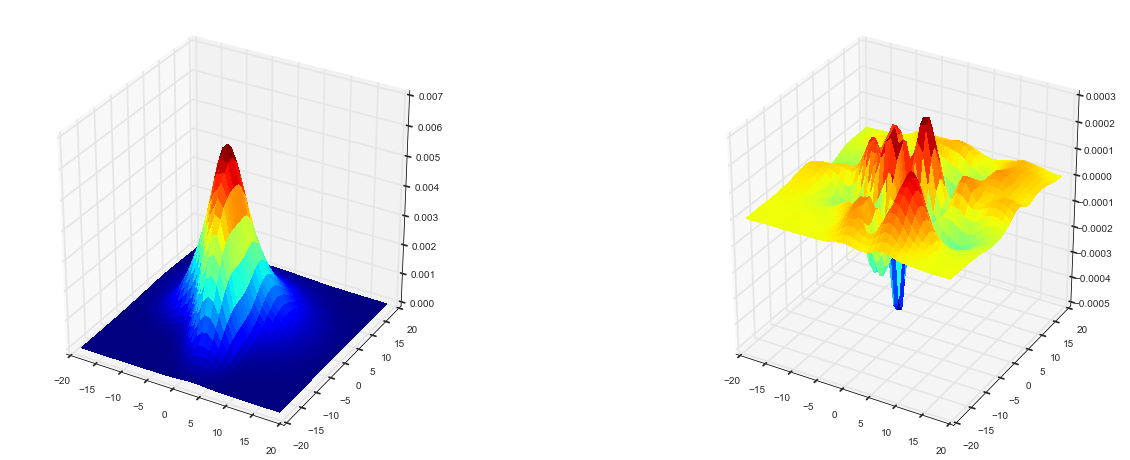

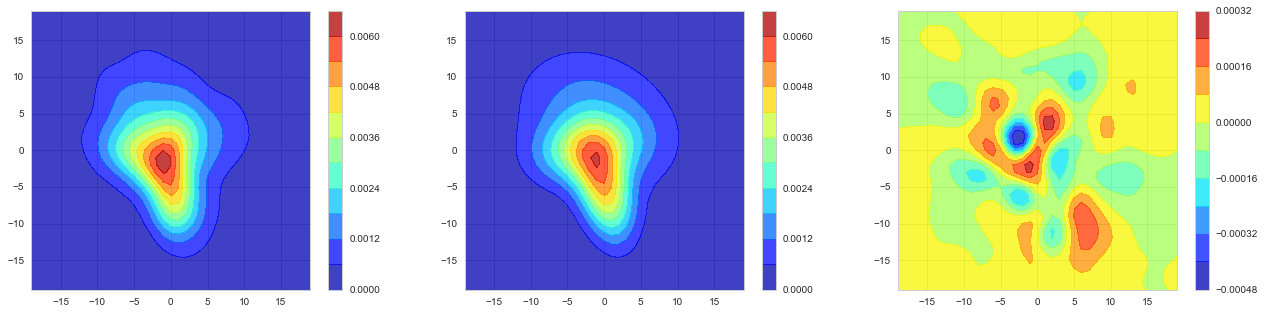

In [47]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [48]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = arange(0, max_speed)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x_vals_OEN3_LMSE ]

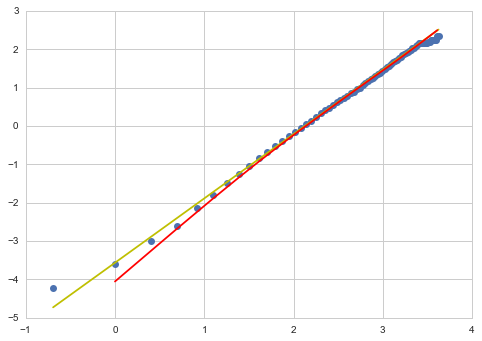

In [49]:
x = arange(0, max_speed, 0.5)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y')

# 3. OEN3 distribution
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r')

plt.show()

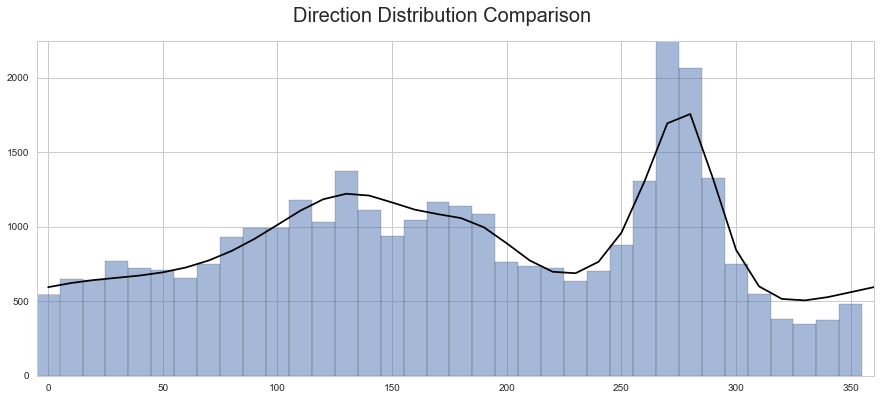

In [50]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5,figsize=(15, 6))

plt.plot(x_vals/pi*180, y_vals,'-', color='black')
plt.suptitle('Direction Distribution Comparison', fontsize = 20)
plt.axis('tight')
plt.show()

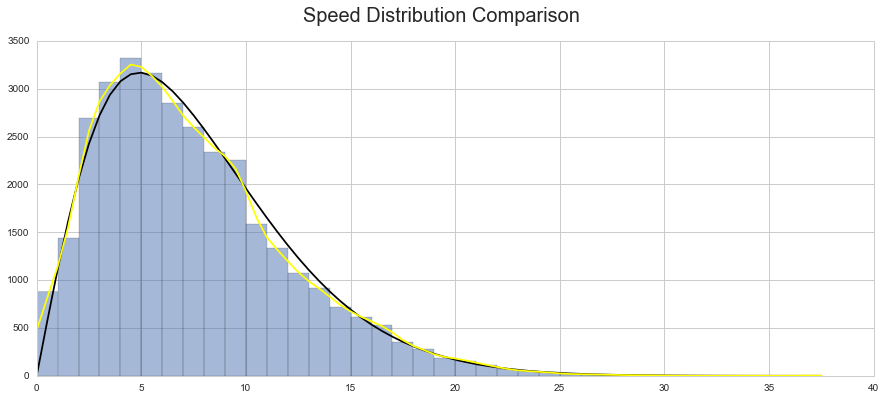

In [51]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.2
plt.plot(x_vals, y_vals,'-', color='black')

# 2. Observation
df['speed'].hist(bins=arange(0, max_speed), alpha=0.5,figsize=(15, 6))

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

plt.suptitle('Speed Distribution Comparison', fontsize = 20)
plt.show()

## 5.3 Sectoral Comaprison

In [52]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    hist_y_axis = [0, max_speed, 0, max_count]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Count Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5)
        plt.axis(hist_y_axis)
        
        # 1.2. Model Distribution
        x_vals = linspace(0, sub_max_speed, 20)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        # 2. CDF Comaprison
        x = linspace(0, sub_max_speed, 20)
        # 2.1. Data's empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
                
        # 2.3.1. Plot in ordinary axis
        ax3 = fig.add_subplot(1,3,2)
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color = 'r')
        
        # 2.3.2. Weibull plot
        ax4 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'r')
        
        plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
                     fontsize = 15)
        plt.show()
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()],
    return max_diff_array

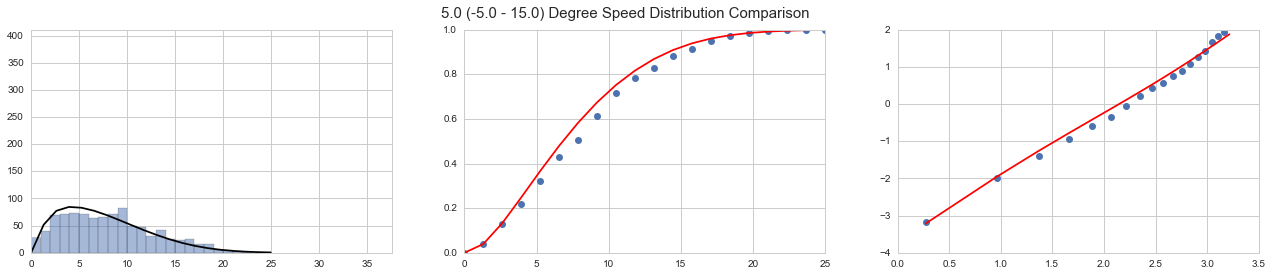

data size: 934
max diff: 0.0754740433577 , speed value: 7.87900255254 y gmm 0.582968690039

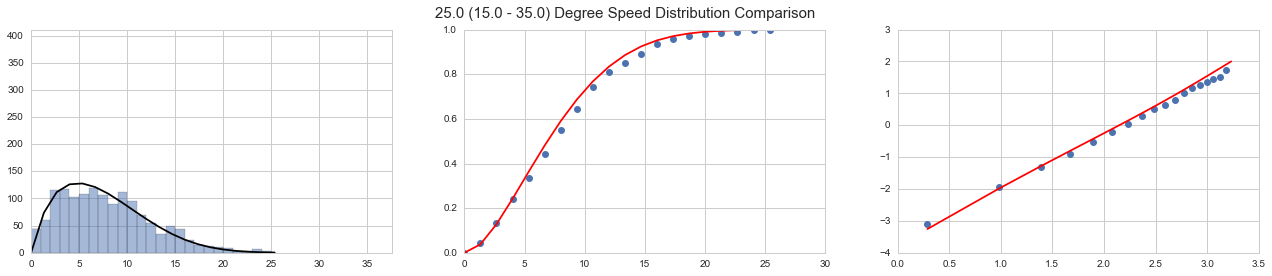

 data size: 1411
max diff: 0.0444473470587 , speed value: 9.34534322421 y gmm 0.686545150035

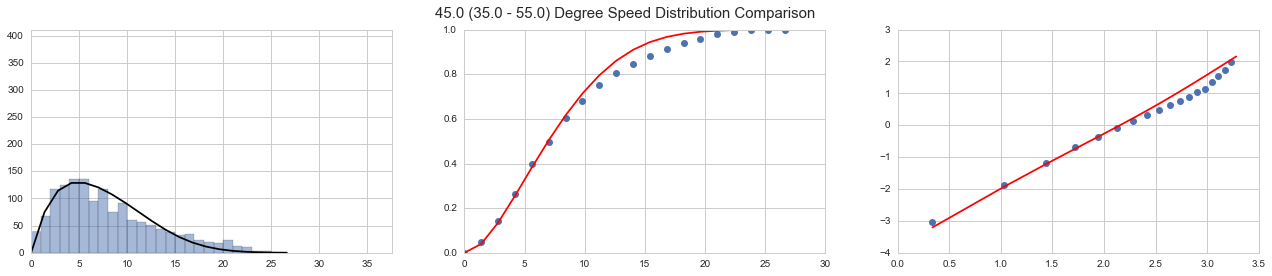

 data size: 1434
max diff: 0.0627356284256 , speed value: 14.0147632645 y gmm 0.909318613084

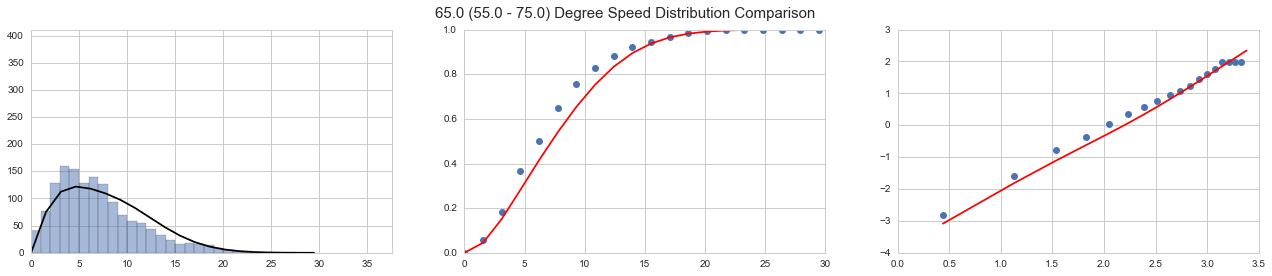

 data size: 1411
max diff: 0.109657050589 , speed value: 7.75470943717 y gmm 0.539527924606

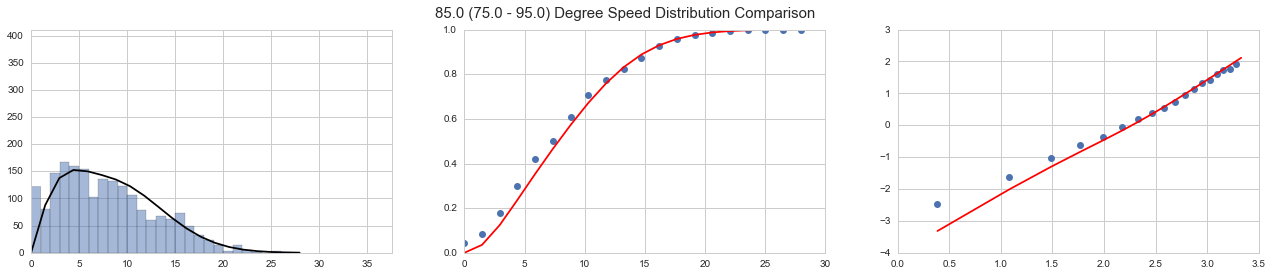

 data size: 1923
max diff: 0.0664786666683 , speed value: 5.88599811185 y gmm 0.353698140404

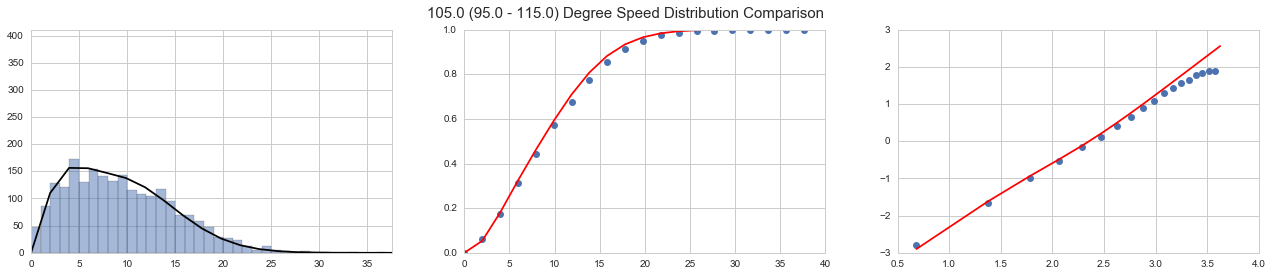

 data size: 2176
max diff: 0.0346728065442 , speed value: 11.8725477057 y gmm 0.708845600662

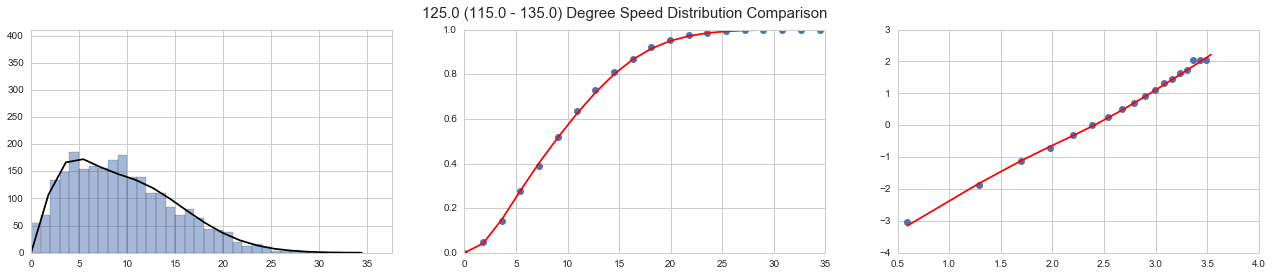

 data size: 2411
max diff: 0.0157848581641 , speed value: 10.8726437534 y gmm 0.621295191608

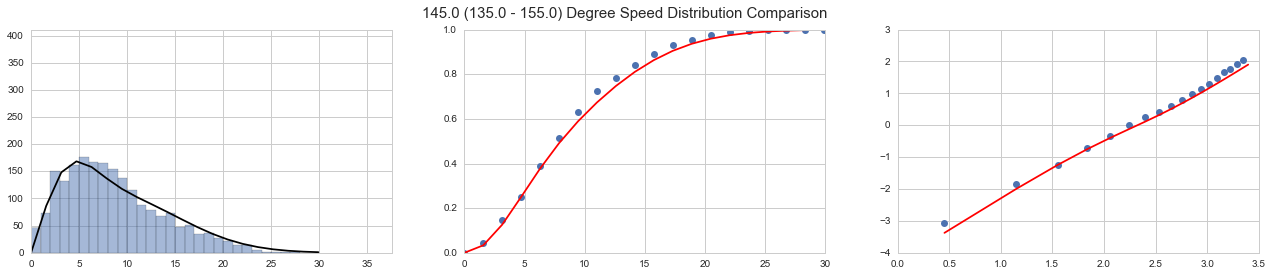

 data size: 2046
max diff: 0.0505630527395 , speed value: 11.0212154148 y gmm 0.673777123214

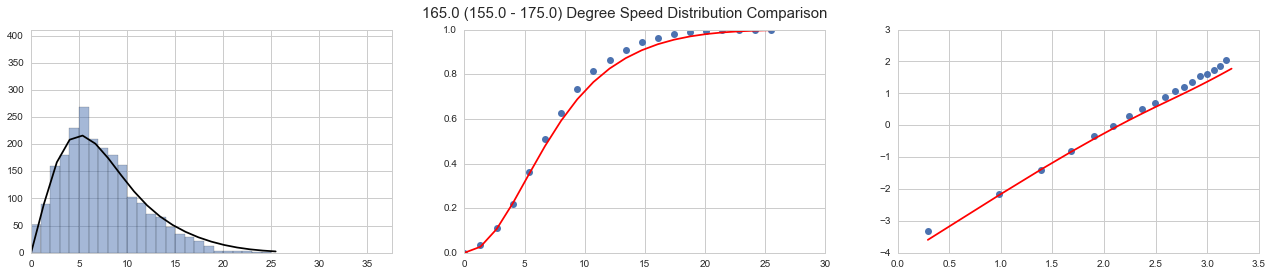

 data size: 2216
max diff: 0.0477319640136 , speed value: 10.7233006515 y gmm 0.764993667755

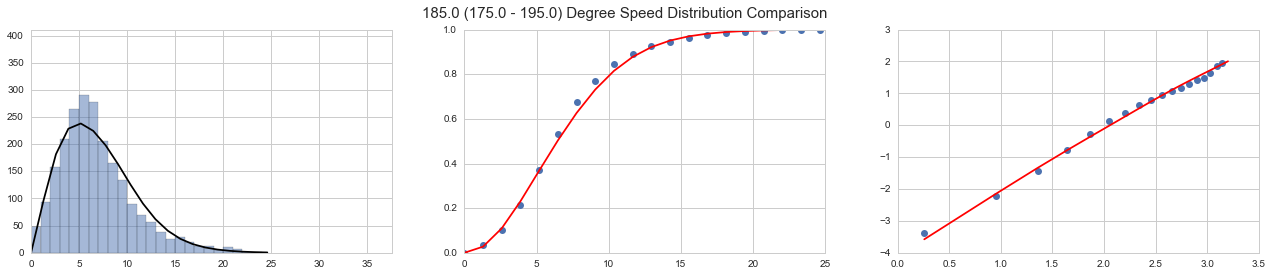

 data size: 2229
max diff: 0.0493941581055 , speed value: 7.76847354532 y gmm 0.626245142029

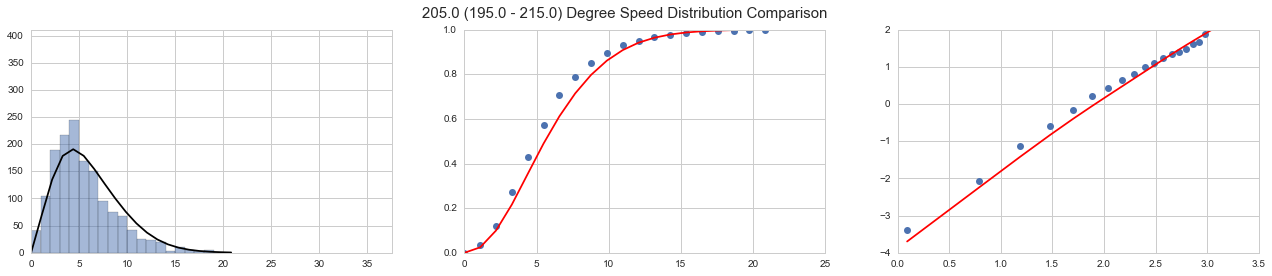

 data size: 1499
max diff: 0.0970894122356 , speed value: 6.57903394541 y gmm 0.611382902641

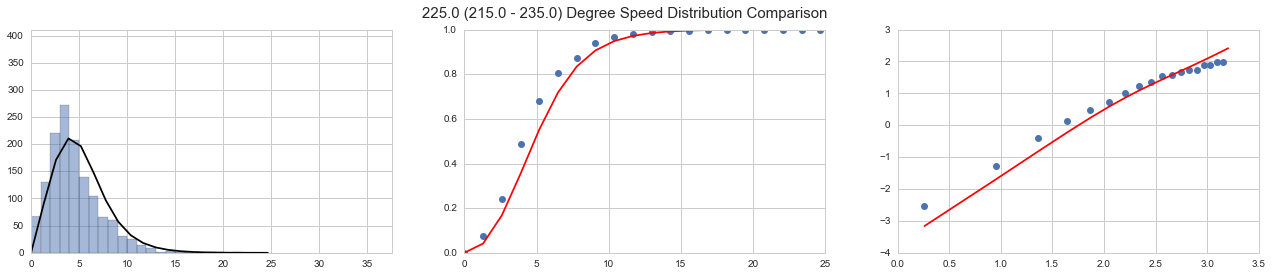

 data size: 1359
max diff: 0.133557170909 , speed value: 3.89169396393 y gmm 0.354301548738

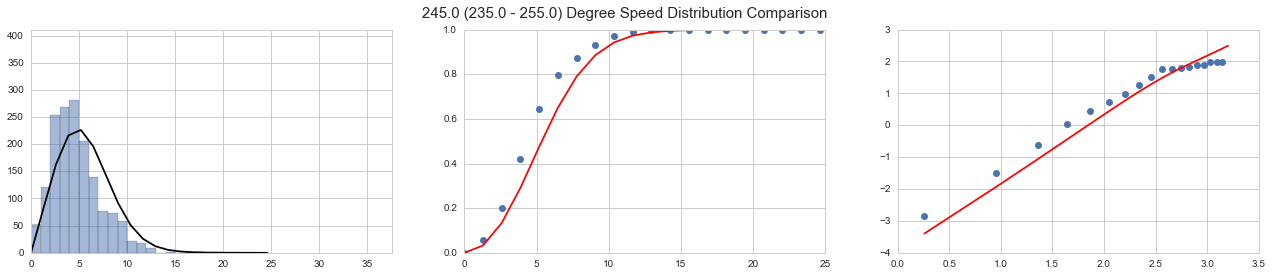

 data size: 1585
max diff: 0.168851656182 , speed value: 5.18113523023 y gmm 0.475312381672

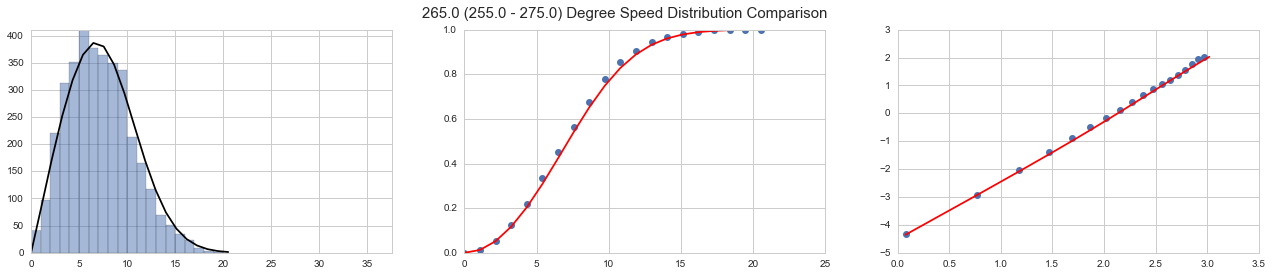

 data size: 3556
max diff: 0.030576357875 , speed value: 6.48212185409 y gmm 0.422741977333

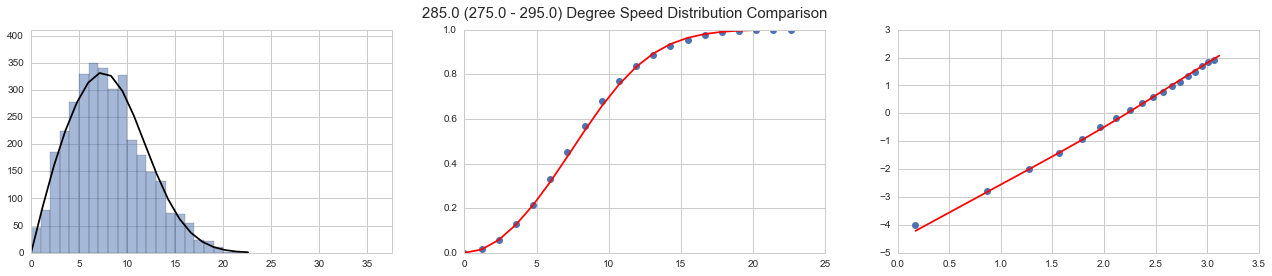

 data size: 3393
max diff: 0.0237662605571 , speed value: 9.51350251652 y gmm 0.656752454444

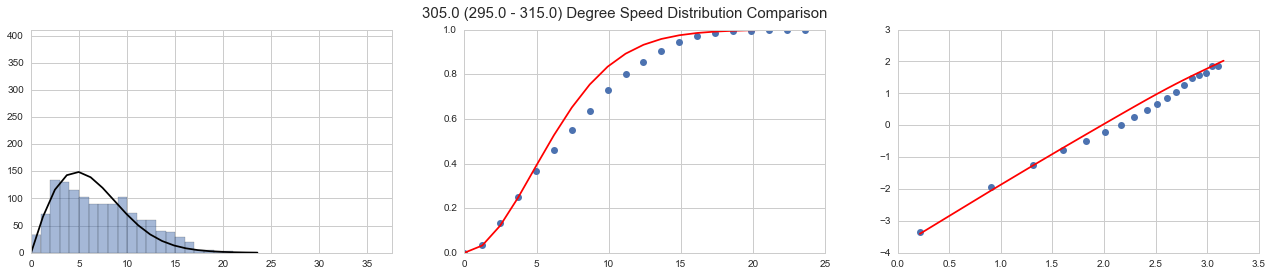

 data size: 1298
max diff: 0.119292246839 , speed value: 8.68259080669 y gmm 0.754115051154

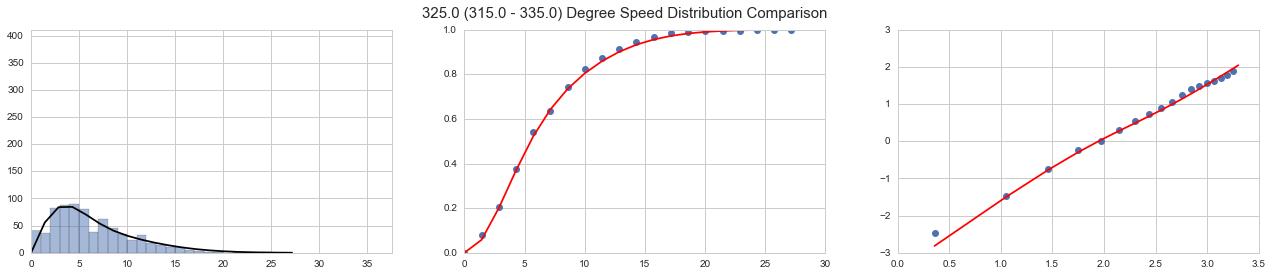

 data size: 731
max diff: 0.0225650988561 , speed value: 1.43031440546 y gmm 0.058146255453

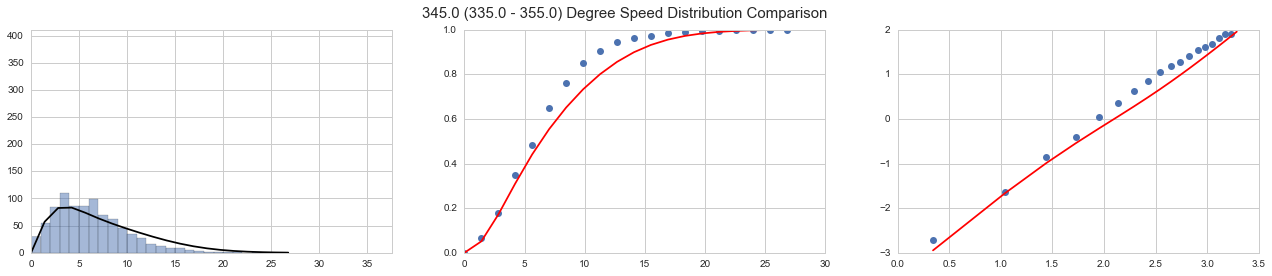

 data size: 852
max diff: 0.116223154352 , speed value: 9.86586131061 y gmm 0.732368394944


In [53]:
if len(effective_coloumn) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variability over the years

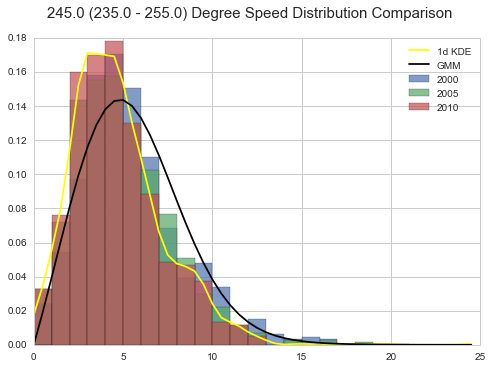

In [54]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow', label = '1d KDE')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.2
plt.plot(x_vals, y_vals,'-', color='black', label = 'GMM')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)
plt.legend()
plt.show()

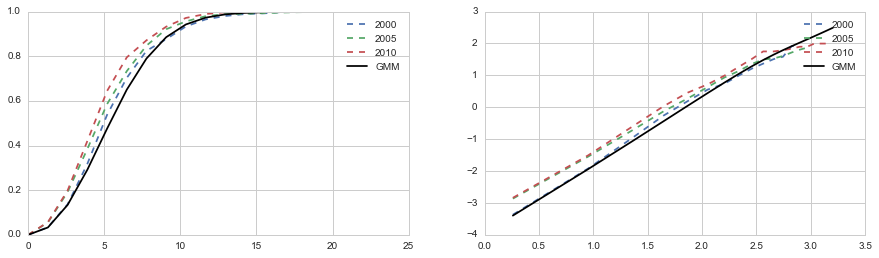

In [55]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black', label = 'GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label = 'GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variability of each sector

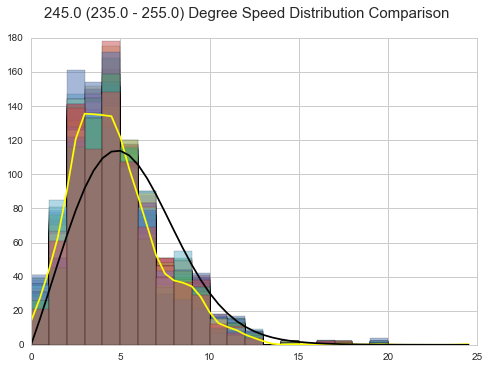

In [56]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.5)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

#2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.2 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)

0.176642221102 5.18113523023 0.475312381672


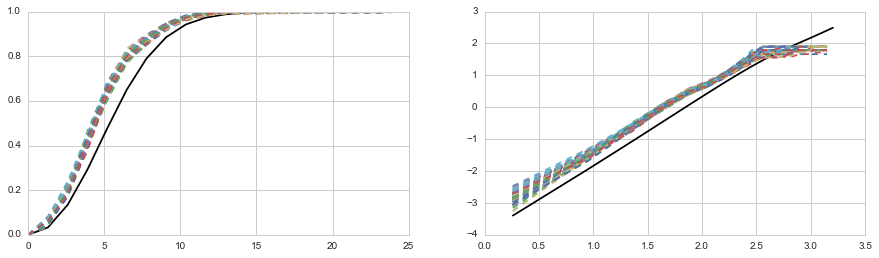

In [57]:
fig = plt.figure(figsize=(15,4))

x = linspace(0, max_speed, 20)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variability of results & Cross-Validation

In [58]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variability of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.507696,-0.919041,3.796182,7.229928,6.593529,-0.211222
2,0.294140,0.044157,-5.397747,2.569297,4.578660,-0.350363
3,0.198164,-2.319999,0.176511,4.520985,2.836440,0.206724


GMM Plot Result
0.507696012643 [[-0.91904143  3.79618248]] [ 6.07332642  7.67210479] -123.201133581
0.29414016464 [[ 0.04415707 -5.39774699]] [ 2.34575402  4.69711137] -165.073540576
0.198163822716 [[-2.3199985   0.17651122]] [ 2.73901292  4.58066644] -78.4198733069


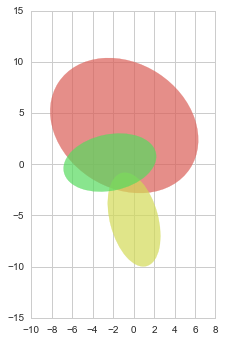

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025893,0.010936,7.129930e-09,0.013329,0.105774,0.994969


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.481931,-0.791761,4.132389,7.451457,6.084336,-0.211117
2,0.288294,0.132647,-5.586462,2.576000,4.555625,-0.343207
3,0.229776,-2.482207,-0.111782,4.367432,2.951248,0.130359


GMM Plot Result
0.481930572534 [[-0.79176145  4.13238872]] [ 5.74100945  7.71907821] -112.985322833
0.288293624997 [[ 0.13264738 -5.5864617 ]] [ 2.35957069  4.67139428] -165.146115238
0.22977580247 [[-2.48220728 -0.11178201]] [ 2.90590433  4.3977321 ] -81.0179140367


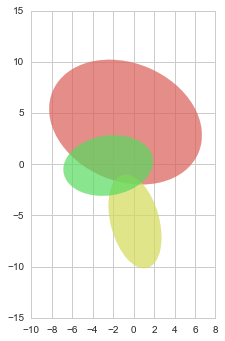

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.026042,0.0118,7.847813e-09,0.013759,0.110962,0.994577


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.492290,-0.961154,4.073421,7.258836,6.432258,-0.221309
2,0.296025,-0.008458,-5.452634,2.605788,4.496081,-0.365722
3,0.211685,-2.259455,0.139564,4.594819,2.918714,0.201024


GMM Plot Result
0.492289789537 [[-0.96115414  4.07342065]] [ 5.93729026  7.66897818] -120.64745918
0.296025137529 [[-0.00845777 -5.45263371]] [ 2.35353913  4.63311186] -163.72414057
0.211685072933 [[-2.25945488  0.1395642 ]] [ 2.82241742  4.65459072] -78.4110027376


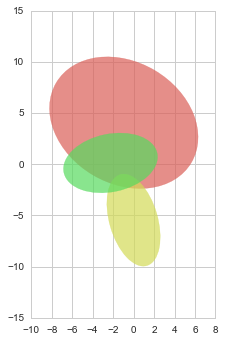

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.0221,0.010327,6.551514e-09,0.012802,0.101386,0.995414


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.487846,-0.735347,4.196089,7.341883,6.367725,-0.248870
2,0.279303,0.057911,-5.588192,2.574793,4.468306,-0.328282
3,0.232851,-2.560676,-0.121936,4.411024,2.988324,0.147582


GMM Plot Result
0.487845602707 [[-0.73534713  4.19608895]] [ 5.81468305  7.78720904] -120.073573797
0.279303418629 [[ 0.05791132 -5.58819181]] [ 2.37365147  4.5783289 ] -165.236209223
0.232850978664 [[-2.56067645 -0.12193635]] [ 2.92951952  4.45029513] -79.8579907319


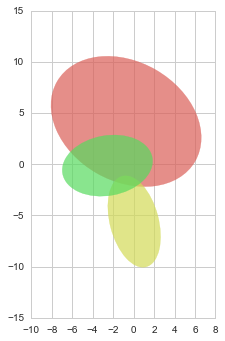

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025148,0.009468,6.761018e-09,0.012981,0.102908,0.995228


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.495887,-0.999446,3.822973,7.188015,6.459596,-0.231145
2,0.297066,-0.025734,-5.467847,2.573901,4.598386,-0.351254
3,0.207046,-2.398466,0.024587,4.606847,2.930361,0.184940


GMM Plot Result
0.495887370756 [[-0.9994461   3.82297264]] [ 5.90503037  7.65013452] -122.574684963
0.297066238812 [[-0.02573419 -5.46784718]] [ 2.34923413  4.71711956] -165.101568906
0.207046390432 [[-2.39846614  0.02458721]] [ 2.8480895   4.65815854] -79.2189944016


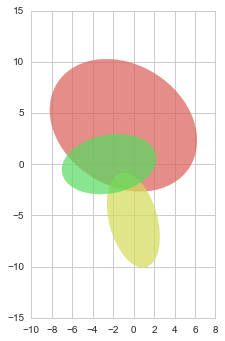

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.026886,0.011717,7.612650e-09,0.013713,0.109115,0.994706


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.467083,-0.723708,4.248131,7.444625,6.274083,-0.242714
2,0.306793,0.053012,-5.336502,2.654618,4.644601,-0.369032
3,0.226124,-2.515388,-0.076204,4.550960,3.054653,0.161996


GMM Plot Result
0.467082628314 [[-0.72370805  4.24813053]] [ 5.78802426  7.82849472] -117.346117705
0.306793216637 [[ 0.05301244 -5.33650235]] [ 2.39570712  4.78329411] -163.96649412
0.226124155048 [[-2.51538837 -0.07620438]] [ 2.98353347  4.59789872] -79.2038914026


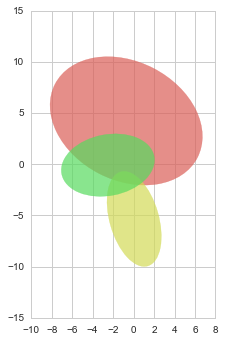

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025413,0.010274,8.673495e-09,0.014214,0.116533,0.994


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.481017,-0.926279,4.014465,7.333634,6.475054,-0.234123
2,0.287699,0.074842,-5.628330,2.604578,4.539401,-0.376677
3,0.231284,-2.257145,0.064749,4.669343,3.010364,0.192008


GMM Plot Result
0.481016580767 [[-0.92627892  4.01446517]] [ 5.9375987  7.7751809] -120.966584208
0.287699212715 [[ 0.07484239 -5.62832971]] [ 2.3394829   4.68153937] -163.601179926
0.231284206518 [[-2.25714483  0.06474875]] [ 2.91789796  4.72767615] -78.5192731719


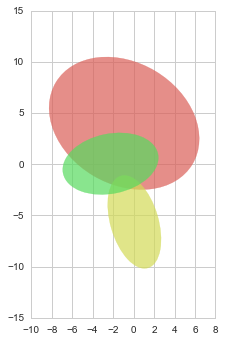

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.021087,0.009075,6.975534e-09,0.013209,0.104525,0.995074


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.497591,-1.032488,3.873625,7.384823,6.598485,-0.214097
2,0.277534,0.119246,-5.582743,2.562220,4.494103,-0.368617
3,0.224874,-2.157000,0.069438,4.427460,2.882519,0.168242


GMM Plot Result
0.497591496724 [[-1.03248833  3.8736255 ]] [ 6.10288199  7.79938761] -121.105831167
0.277534327258 [[ 0.11924643 -5.58274339]] [ 2.31330609  4.62715354] -164.043961331
0.224874176017 [[-2.15699977  0.06943767]] [ 2.81326669  4.47178368] -79.5904631873


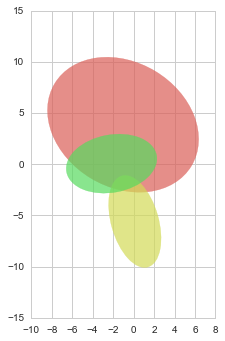

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.018337,0.00861,7.860731e-09,0.013639,0.111031,0.994516


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.474775,-0.683993,4.066989,7.329335,6.612912,-0.241352
2,0.292398,0.055118,-5.377491,2.557146,4.526935,-0.348284
3,0.232827,-2.536421,0.190206,4.462379,3.009606,0.159433


GMM Plot Result
0.474774741458 [[-0.68399255  4.06698925]] [ 6.00045404  7.83864204] -123.440287268
0.292398021537 [[ 0.05511837 -5.37749139]] [ 2.33620936  4.64481032] -164.989124269
0.232827237006 [[-2.53642094  0.19020573]] [ 2.94119756  4.50776155] -79.2353221648


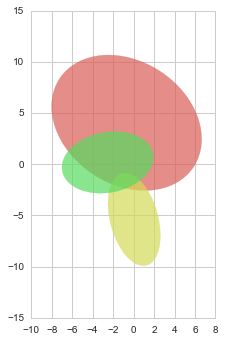

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.023022,0.009855,6.803795e-09,0.012838,0.10338,0.995344


,weight,mean_x,mean_y,sig_x,sig_y,corr
1,0.490665,-0.960138,4.016098,7.325664,6.459750,-0.251028
2,0.286822,0.017240,-5.409420,2.550144,4.636190,-0.348903
3,0.222514,-2.428551,-0.062223,4.519344,2.979927,0.149356


GMM Plot Result
0.490664529424 [[-0.96013848  4.01609793]] [ 5.86537358  7.80968106] -121.661745158
0.286821968588 [[ 0.01724026 -5.40942042]] [ 2.33304736  4.74914535] -165.587167328
0.222513501988 [[-2.42855107 -0.06222342]] [ 2.92225058  4.55685024] -80.394213587


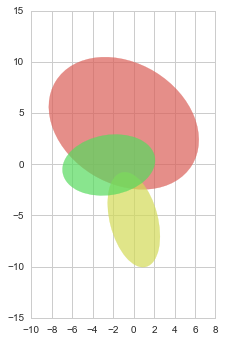

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025231,0.010183,7.143243e-09,0.013189,0.10583,0.995017


In [59]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross-validation, to select the number of Gaussian

In [60]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 24540.75 8180.25
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.219596,0.072641,1.919956e-07,0.068118,0.548326,0.866558
1,0.212156,0.071828,1.890045e-07,0.069181,0.544259,0.867420
2,0.221826,0.073741,1.946910e-07,0.069044,0.552316,0.864848
3,0.217610,0.073820,1.900546e-07,0.068757,0.546042,0.867841


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.221033,0.072908,1.924632e-07,0.070067,0.549869,0.865266
1,0.234597,0.082707,2.065949e-07,0.069075,0.569005,0.859240
2,0.223667,0.065669,1.744401e-07,0.066796,0.523049,0.877482
3,0.221321,0.071735,2.019551e-07,0.069513,0.561735,0.858937


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.079087,0.038967,2.811801e-08,0.026349,0.209865,0.980504
1,0.084308,0.040517,2.874622e-08,0.026929,0.212255,0.979823
2,0.093748,0.042629,3.205575e-08,0.028139,0.224237,0.977694
3,0.074903,0.038926,3.016521e-08,0.027026,0.217394,0.979038


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.102697,0.046517,3.792768e-08,0.030710,0.244005,0.973260
1,0.095771,0.040523,3.585289e-08,0.028963,0.237041,0.975624
2,0.075975,0.039040,2.595440e-08,0.025139,0.201421,0.981899
3,0.079356,0.039100,3.327356e-08,0.029147,0.228472,0.976718


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.022030,0.009771,6.688576e-09,0.012873,0.102407,0.995336
1,0.023092,0.009454,7.141803e-09,0.013124,0.105849,0.995034
2,0.021463,0.009187,6.842533e-09,0.013083,0.103508,0.995218
3,0.023324,0.009242,6.850818e-09,0.013091,0.103592,0.995243


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.031109,0.018632,1.281604e-08,0.017724,0.141629,0.991125
1,0.025454,0.017958,1.063503e-08,0.016708,0.128912,0.992573
2,0.029588,0.013469,1.048668e-08,0.015832,0.128379,0.992780
3,0.023804,0.008150,9.108700e-09,0.014719,0.119570,0.993604


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.049692,0.008253,4.214279e-09,0.010212,0.081269,0.997054
1,0.042840,0.007128,3.872749e-09,0.009875,0.077914,0.997273
2,0.011946,0.004858,4.931315e-09,0.010954,0.087897,0.996582
3,0.037674,0.006627,3.934171e-09,0.009848,0.078529,0.997286


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.031785,0.008323,5.959651e-09,0.011903,0.096648,0.995899
1,0.061777,0.009952,7.715156e-09,0.013472,0.109930,0.994801
2,0.016106,0.009795,9.192493e-09,0.015446,0.120091,0.993518
3,0.044786,0.012726,8.390394e-09,0.014442,0.114641,0.993994


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.009431,0.002584,2.682113e-09,0.008119,0.064815,0.998138
1,0.012546,0.004453,2.894110e-09,0.008512,0.067369,0.997978
2,0.009722,0.004594,2.414422e-09,0.007755,0.061483,0.998320
3,0.013015,0.006246,2.822215e-09,0.008288,0.066540,0.998031


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.014327,0.010820,6.931639e-09,0.013011,0.104323,0.995132
1,0.013435,0.005716,5.461862e-09,0.011383,0.092435,0.996235
2,0.018445,0.010806,6.755241e-09,0.012747,0.103050,0.995285
3,0.017617,0.011956,7.040701e-09,0.013544,0.104885,0.995127


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.006985,0.007358,1.289770e-09,0.005616,0.044950,0.999105
1,0.006346,0.005971,1.305562e-09,0.005668,0.045258,0.999086
2,0.016400,0.002988,9.720257e-10,0.004926,0.039016,0.999327
3,0.006241,0.006340,1.156711e-09,0.005337,0.042581,0.999190


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.015047,0.013455,6.254833e-09,0.012394,0.099074,0.995606
1,0.009418,0.013326,4.990159e-09,0.011034,0.088297,0.996577
2,0.028700,0.013756,7.035131e-09,0.012976,0.105124,0.995014
3,0.011848,0.009864,6.173857e-09,0.012436,0.098342,0.995776


In [61]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)

Train gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.217797,0.073008,1.914364e-07,0.068775,0.547736,0.866667
1,0.083011,0.040260,2.977130e-08,0.027111,0.215938,0.979265
2,0.022477,0.009413,6.880932e-09,0.013043,0.103839,0.995208
3,0.035538,0.006716,4.238128e-09,0.010222,0.081402,0.997049
4,0.011179,0.004469,2.703215e-09,0.008168,0.065051,0.998117
5,0.008993,0.005664,1.181017e-09,0.005387,0.042951,0.999177


Test gof mean, std


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.225154,0.073255,1.938633e-07,0.068863,0.550915,0.865231
1,0.088450,0.041295,3.325213e-08,0.028490,0.227735,0.976876
2,0.027488,0.014552,1.076161e-08,0.016246,0.129622,0.992520
3,0.038613,0.010199,7.814423e-09,0.013815,0.110327,0.994553
4,0.015956,0.009825,6.547360e-09,0.012671,0.101174,0.995445
5,0.016253,0.012600,6.113495e-09,0.012210,0.097709,0.995743


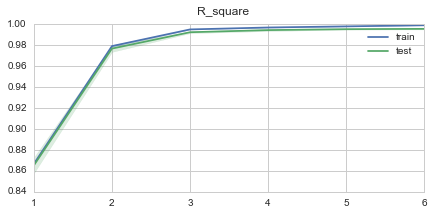

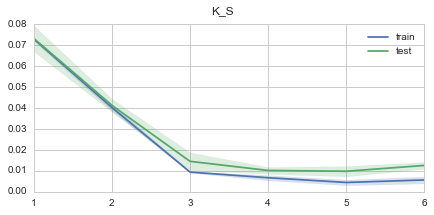

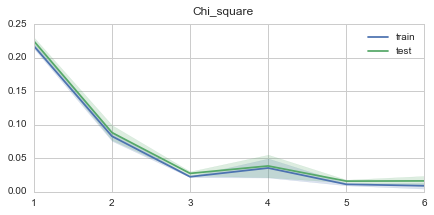

In [62]:
prop_cycle=sns.color_palette()
for column in ['R_square','K_S','Chi_square', ]:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.legend()
    plt.show()

In [63]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(ipath)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)

## 6.3 Variability of KDE

In [64]:
sss

NameError: name 'sss' is not defined

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
# 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        